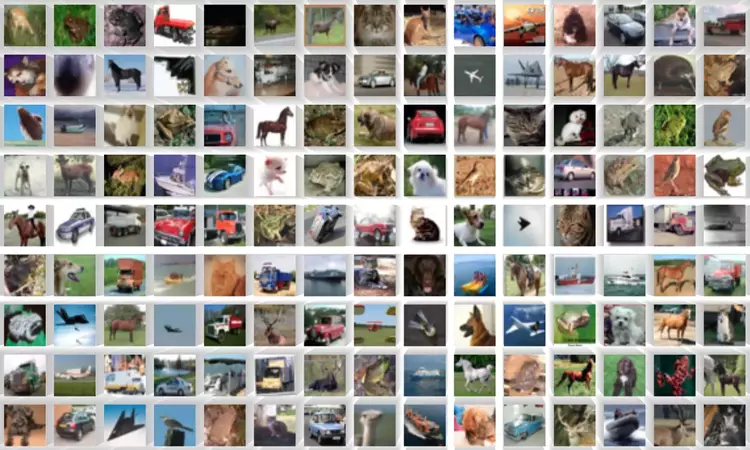

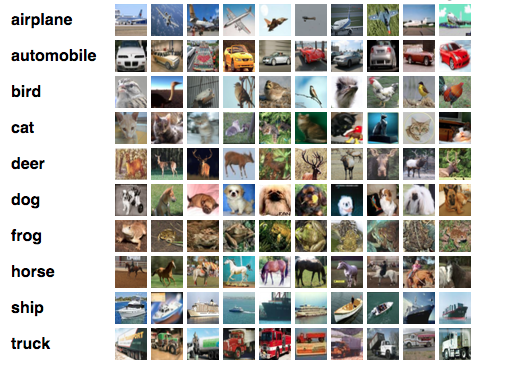

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 71s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

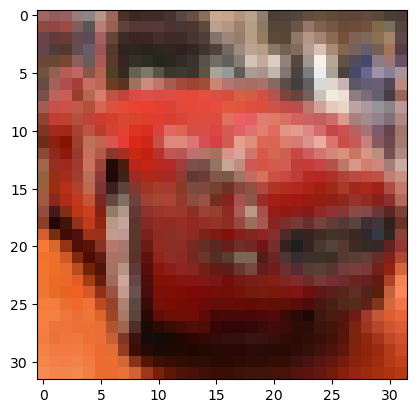

In [7]:
plt.imshow(X_train[5])

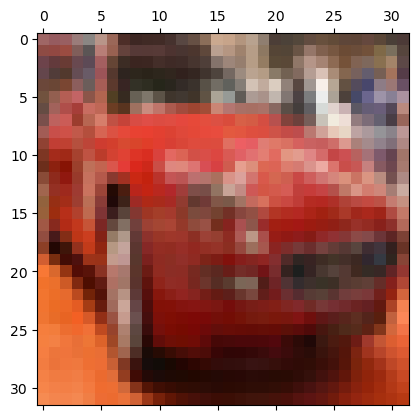

In [8]:
plt.matshow(X_train[5])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train  # bunların hepsi birer skala değer, bu şekilde modele verirsek model bunun regresyon problem olduğunu düşünür. 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
np.unique(y_train, return_counts=True)   # Array içindeki unique değerleri gösteriyor. 
#return_counts= True ile bu değerlerin sayılarını da görmüş oluyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [14]:
y_train[3]

array([4], dtype=uint8)

In [15]:
classes[int(y_train[3])]   # bunu indeksleyebiliyoruz. 

C:\Users\mertu\AppData\Local\Temp\ipykernel_4024\2666834997.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(y_train[3])]   # bunu indeksleyebiliyoruz.


'deer'

In [16]:
int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.

C:\Users\mertu\AppData\Local\Temp\ipykernel_4024\4201043552.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(np.random.randint(low=0, high=50000, size=1))  # 0 ile 50.000 arasında rastgele bir sayı döndürecek.


23513

In [17]:
np.random.randint(low=0, high=50000, size=17) 

array([29276,  3713, 33246, 11008, 24517, 38536, 18035,  1851, 28465,
          93, 35481, 20979, 49819, 22821, 34210, 38931, 41924])

In [18]:
np.random.randint(low=0, high=50000, size=17) 

array([15004,  5422, 13439, 48707, 13859, 21216, 21708, 21621, 32272,
       40326, 49344, 45353, 24428, 15302, 33498, 16472,  9373])

In [19]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor. 

C:\Users\mertu\AppData\Local\Temp\ipykernel_4024\2521659651.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_train[int(np.random.randint(low=0, high=50000, size=1))]   # X Train içindeki bir resmi rastgele seçmiş oluyor.


array([[[221, 195, 180],
        [223, 197, 182],
        [228, 201, 186],
        ...,
        [234, 205, 191],
        [230, 203, 188],
        [226, 200, 185]],

       [[224, 198, 183],
        [225, 199, 184],
        [228, 202, 187],
        ...,
        [231, 203, 189],
        [229, 202, 187],
        [227, 201, 186]],

       [[228, 202, 187],
        [231, 205, 190],
        [233, 207, 192],
        ...,
        [233, 204, 190],
        [229, 202, 187],
        [229, 203, 188]],

       ...,

       [[ 82,  73,  66],
        [101,  93,  85],
        [ 92,  83,  76],
        ...,
        [205, 183, 170],
        [209, 187, 174],
        [196, 174, 161]],

       [[ 74,  65,  58],
        [ 83,  74,  67],
        [ 89,  80,  73],
        ...,
        [202, 185, 170],
        [204, 182, 167],
        [192, 168, 153]],

       [[ 80,  71,  64],
        [ 83,  74,  67],
        [ 85,  76,  69],
        ...,
        [215, 195, 181],
        [213, 188, 172],
        [214, 187, 169]]

C:\Users\mertu\AppData\Local\Temp\ipykernel_4024\4149529772.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_index = int(np.random.randint(low=0, high=50000, size=1))
C:\Users\mertu\AppData\Local\Temp\ipykernel_4024\4149529772.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[rand_index])])


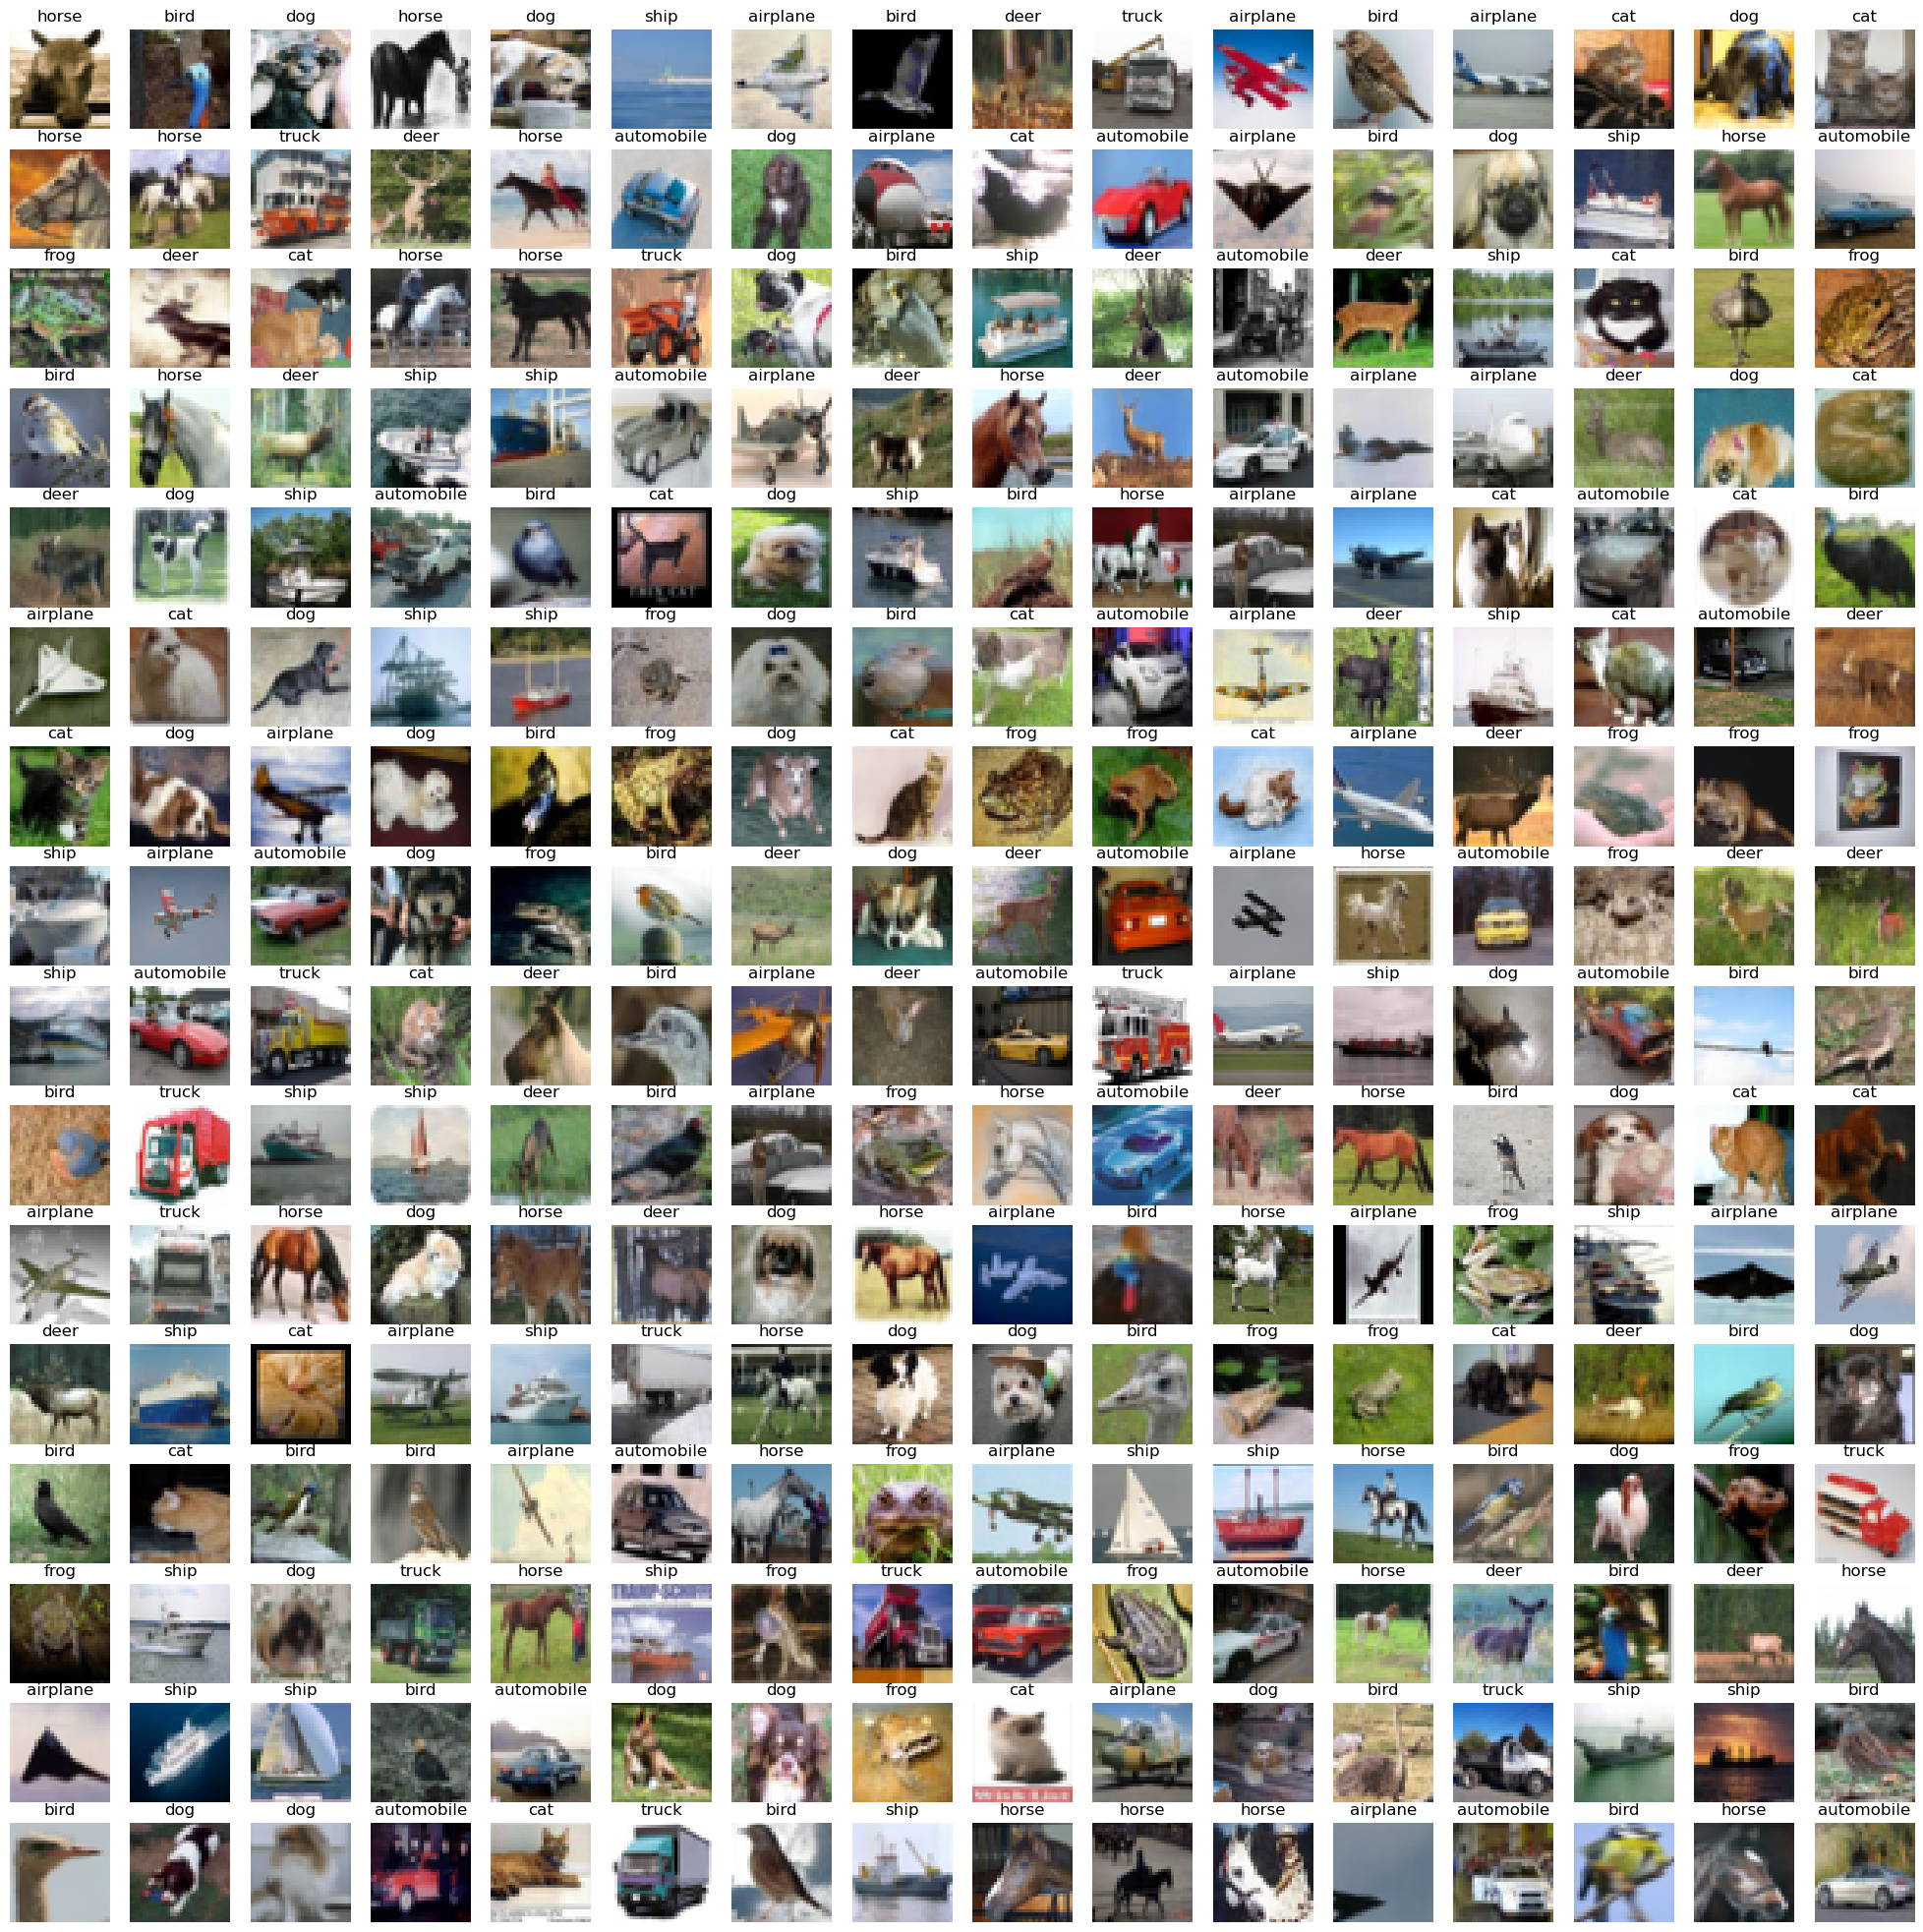

In [20]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [21]:
X_train[5].min()

0

In [22]:
X_train[5].max()

252

In [23]:
# Normalize image pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [24]:
X_train[5].min()

0.0

In [25]:
X_train[5].max()

0.9882353

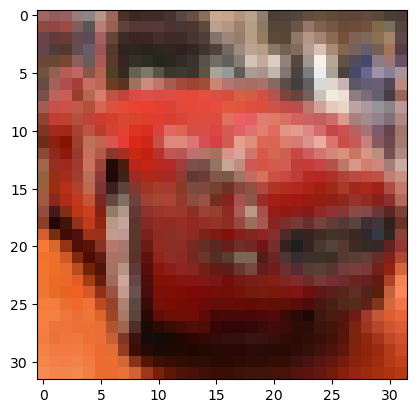

In [26]:
plt.imshow(X_train[5])

In [27]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [28]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

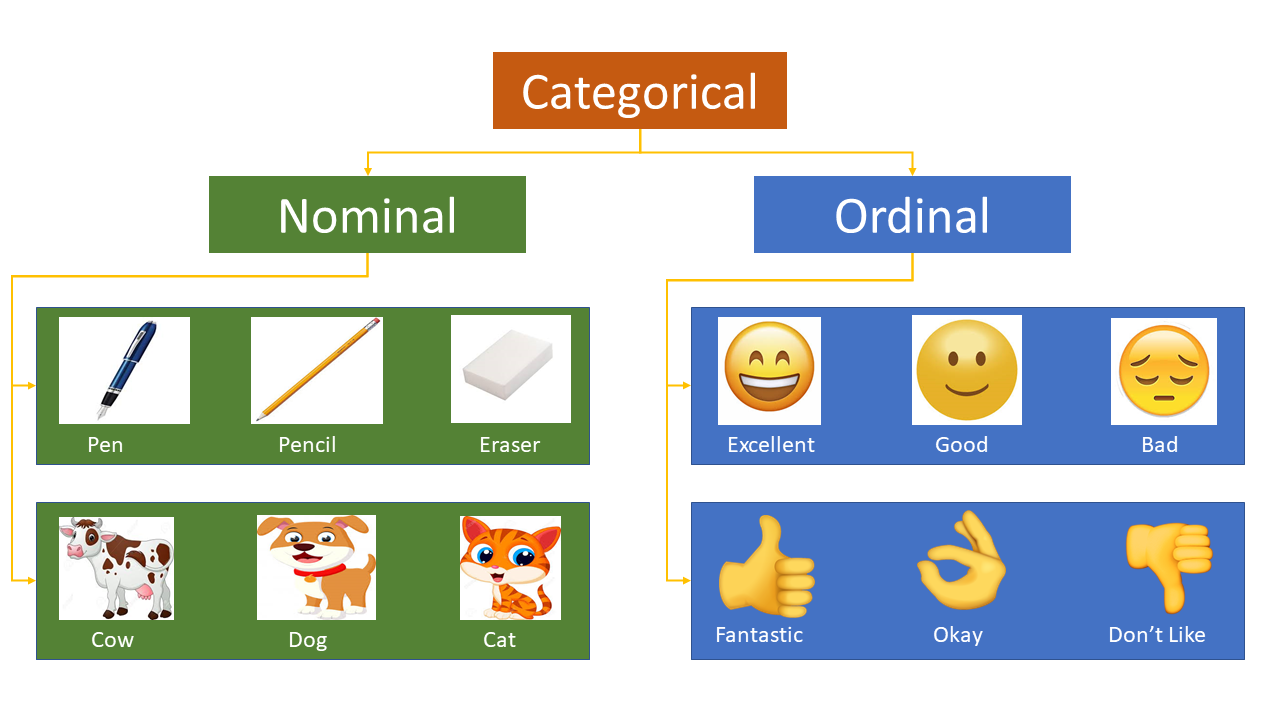

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\mertu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 309,034 (1.18 MB)

 Trainable params: 309,034 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 62ms/step - accuracy: 0.3915 - loss: 1.6497 - val_accuracy: 0.6381 - val_loss: 1.0306
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 154s 70ms/step - accuracy: 0.6601 - loss: 0.9611 - val_accuracy: 0.6761 - val_loss: 0.9404
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 68ms/step - accuracy: 0.7241 - loss: 0.7889 - val_accuracy: 0.7248 - val_loss: 0.8046
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 66ms/step - accuracy: 0.7585 - loss: 0.6859 - val_accuracy: 0.7270 - val_loss: 0.8116
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 69ms/step - accuracy: 0.7908 - loss: 0.6010 - val_accuracy: 0.7349 - val_loss: 0.7925
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 66ms/step - accuracy: 0.8146 - loss: 0.5248 - val_accuracy: 0.7150 - val_loss: 0.8593
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.8366 - loss: 0.4574 - val_accuracy: 0.7244 - val_loss: 0.8681
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - accuracy: 

In [37]:
model.metrics_names

['loss', 'compile_metrics']

In [38]:
model.history.history

{'accuracy': [0.5013599991798401,
  0.6734799742698669,
  0.7260199785232544,
  0.7585800290107727,
  0.7859200239181519,
  0.8077800273895264,
  0.830020010471344,
  0.8484200239181519,
  0.8693000078201294,
  0.8819599747657776],
 'loss': [1.3761581182479858,
  0.9253817200660706,
  0.7838703393936157,
  0.6846780180931091,
  0.6116626858711243,
  0.5436777472496033,
  0.4775623381137848,
  0.4260096251964569,
  0.3693448305130005,
  0.32993602752685547],
 'val_accuracy': [0.6381000280380249,
  0.6761000156402588,
  0.7247999906539917,
  0.7269999980926514,
  0.7348999977111816,
  0.7149999737739563,
  0.724399983882904,
  0.7009000182151794,
  0.7265999913215637,
  0.7182000279426575],
 'val_loss': [1.0305812358856201,
  0.9404255151748657,
  0.8046053647994995,
  0.8115713000297546,
  0.7924663424491882,
  0.8592857718467712,
  0.868104875087738,
  0.9985474348068237,
  0.949174165725708,
  1.0659332275390625]}

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.50136,1.376158,0.6381,1.030581
1,0.67348,0.925382,0.6761,0.940426
2,0.72602,0.783870,0.7248,0.804605
3,0.75858,0.684678,0.7270,0.811571
4,0.78592,0.611663,0.7349,0.792466


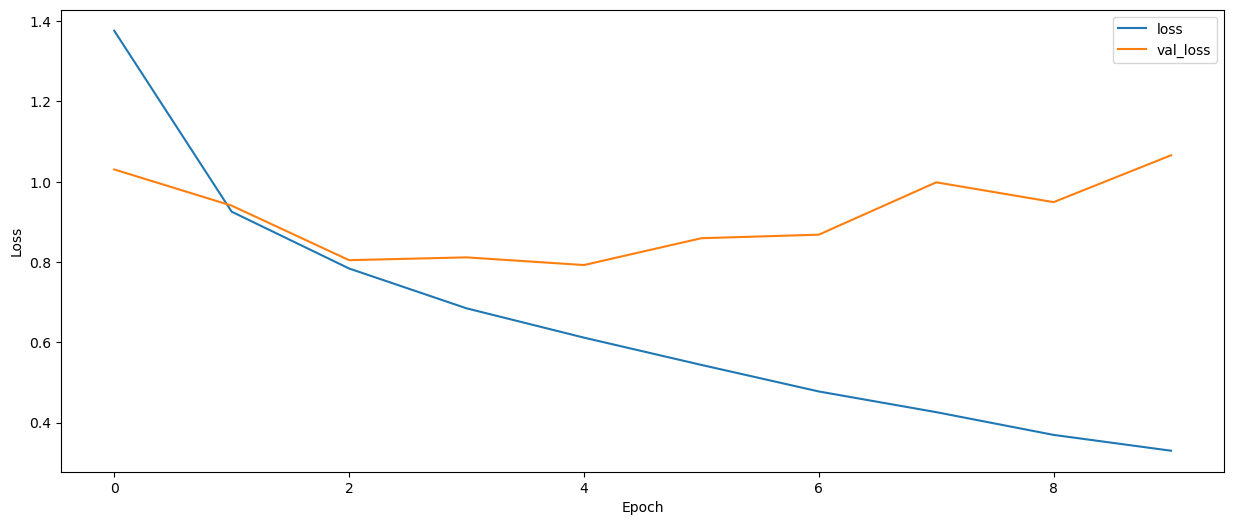

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

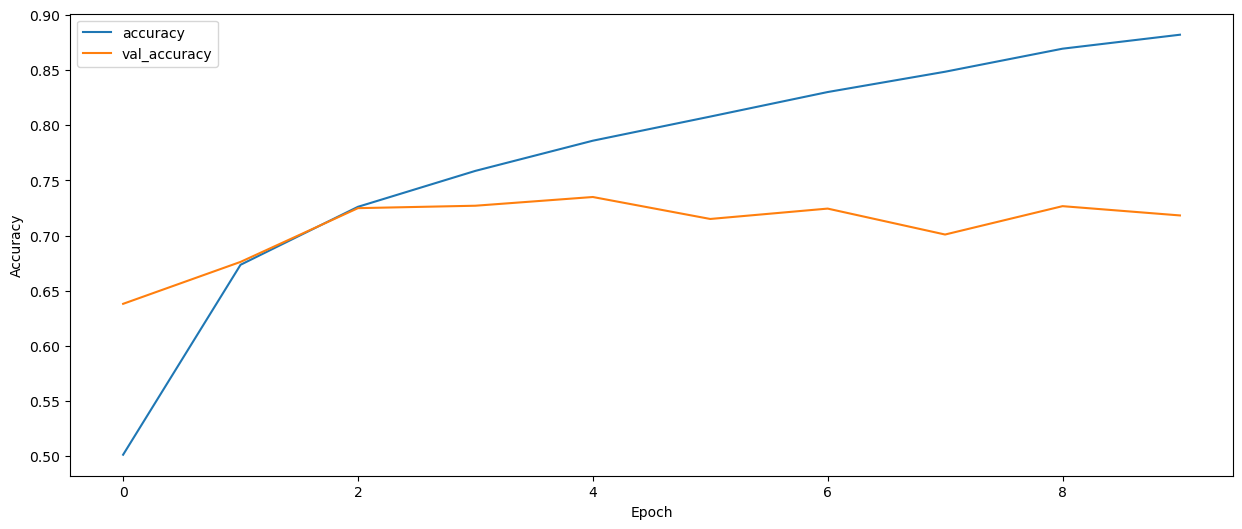

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7174 - loss: 1.0697
[1.0659332275390625, 0.7182000279426575]


In [45]:
preds = model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step


In [46]:
predictions = np.argmax(preds, axis=1)

In [47]:
predictions

array([3, 8, 8, ..., 3, 4, 7], dtype=int64)

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1000
           1       0.74      0.92      0.82      1000
           2       0.60      0.60      0.60      1000
           3       0.56      0.48      0.52      1000
           4       0.64      0.72      0.68      1000
           5       0.70      0.56      0.62      1000
           6       0.82      0.78      0.80      1000
           7       0.81      0.72      0.76      1000
           8       0.81      0.83      0.82      1000
           9       0.84      0.77      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



In [49]:
print(confusion_matrix(y_test, predictions))

[[800  30  51  16   8   3   5   6  58  23]
 [ 16 920   2   2   1   0   2   0  17  40]
 [107  19 596  59  98  30  42  22  18   9]
 [ 53  34  90 483  89 114  57  29  32  19]
 [ 38  14  65  36 719  32  31  50  11   4]
 [ 21  18  73 180  58 559  18  42  22   9]
 [ 15  14  58  30  52  22 780   6  15   8]
 [ 27  15  48  49  80  39   6 719   2  15]
 [ 61  51  11  10   4   3   4   1 835  20]
 [ 47 127   3   3   9   2   4  12  22 771]]


In [50]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0659332275390625
Test accuracy: 0.7182000279426575


In [51]:
my_image = X_test[44]

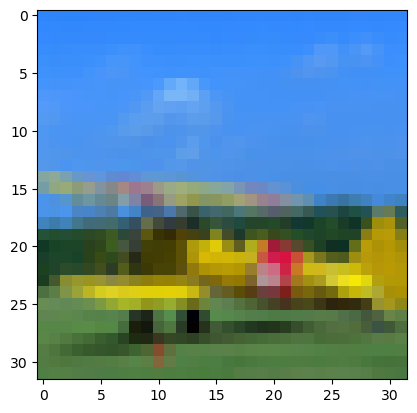

In [52]:
plt.imshow(my_image)

In [53]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [54]:
image_prediction

array([[9.9998927e-01, 5.4478314e-06, 7.5140827e-07, 5.0966445e-12,
        6.5783617e-08, 2.5051027e-12, 3.9263883e-12, 1.5006059e-08,
        1.7008293e-06, 2.8043253e-06]], dtype=float32)

In [55]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [56]:
result=np.argmax(image_prediction, axis=1)

In [57]:
result

array([0], dtype=int64)

In [58]:
classes[int(result)]

C:\Users\mertu\AppData\Local\Temp\ipykernel_4024\2708051357.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(result)]


'airplane'

In [ ]:
#model.save("cnn-2.h5")

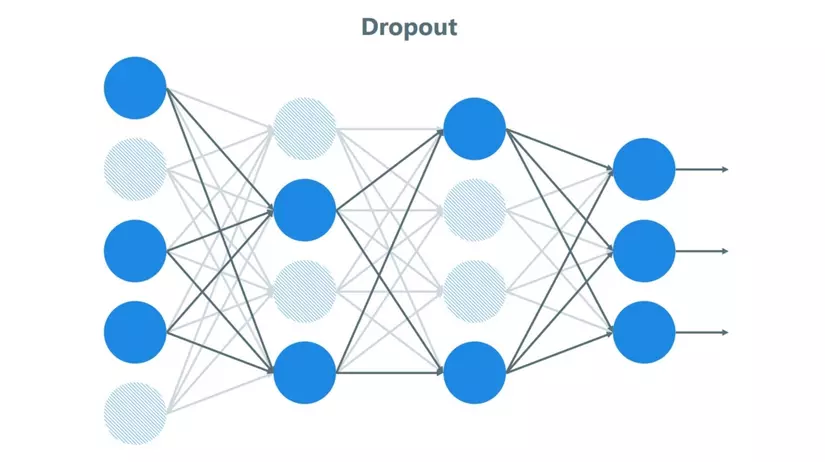

In [59]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [60]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\mertu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,701,706 (6.49 MB)

 Trainable params: 1,701,706 (6.49 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 161s 101ms/step - accuracy: 0.3969 - loss: 1.6426 - val_accuracy: 0.6474 - val_loss: 1.0150
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 99ms/step - accuracy: 0.6453 - loss: 1.0061 - val_accuracy: 0.7149 - val_loss: 0.8314
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 103ms/step - accuracy: 0.7085 - loss: 0.8300 - val_accuracy: 0.7134 - val_loss: 0.8102
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 100ms/step - accuracy: 0.7431 - loss: 0.7313 - val_accuracy: 0.7564 - val_loss: 0.7108
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.7632 - loss: 0.6578 - val_accuracy: 0.7623 - val_loss: 0.6843
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 101ms/step - accuracy: 0.7961 - loss: 0.5789 - val_accuracy: 0.7607 - val_loss: 0.7027
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 101ms/step - accuracy: 0.8075 - loss: 0.5447 - val_accuracy: 0.7688 - val_loss: 0.6874
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 197s 97ms/step

In [63]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8653085827827454
Test accuracy: 0.7692000269889832


In [64]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step


In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.83      0.92      0.87      1000
           2       0.74      0.62      0.68      1000
           3       0.57      0.57      0.57      1000
           4       0.76      0.73      0.74      1000
           5       0.64      0.67      0.65      1000
           6       0.83      0.84      0.83      1000
           7       0.81      0.83      0.82      1000
           8       0.88      0.84      0.86      1000
           9       0.83      0.86      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [66]:
print(confusion_matrix(y_test, predictions))

[[815  21  41  22  15   4   5   7  39  31]
 [  8 918   4   6   1   1   3   5   9  45]
 [ 60   8 625  59  68  65  61  28  14  12]
 [ 23   8  45 573  42 178  57  37  16  21]
 [ 18   4  49  58 727  49  27  58   8   2]
 [ 15   3  27 180  33 669  11  38  11  13]
 [  4   9  22  49  33  29 837   5   8   4]
 [ 14   2  18  41  30  48   6 827   1  13]
 [ 49  42   8  10   4   2   2   8 840  35]
 [ 14  87   5   9   0   4   3   4  13 861]]


<Axes: >

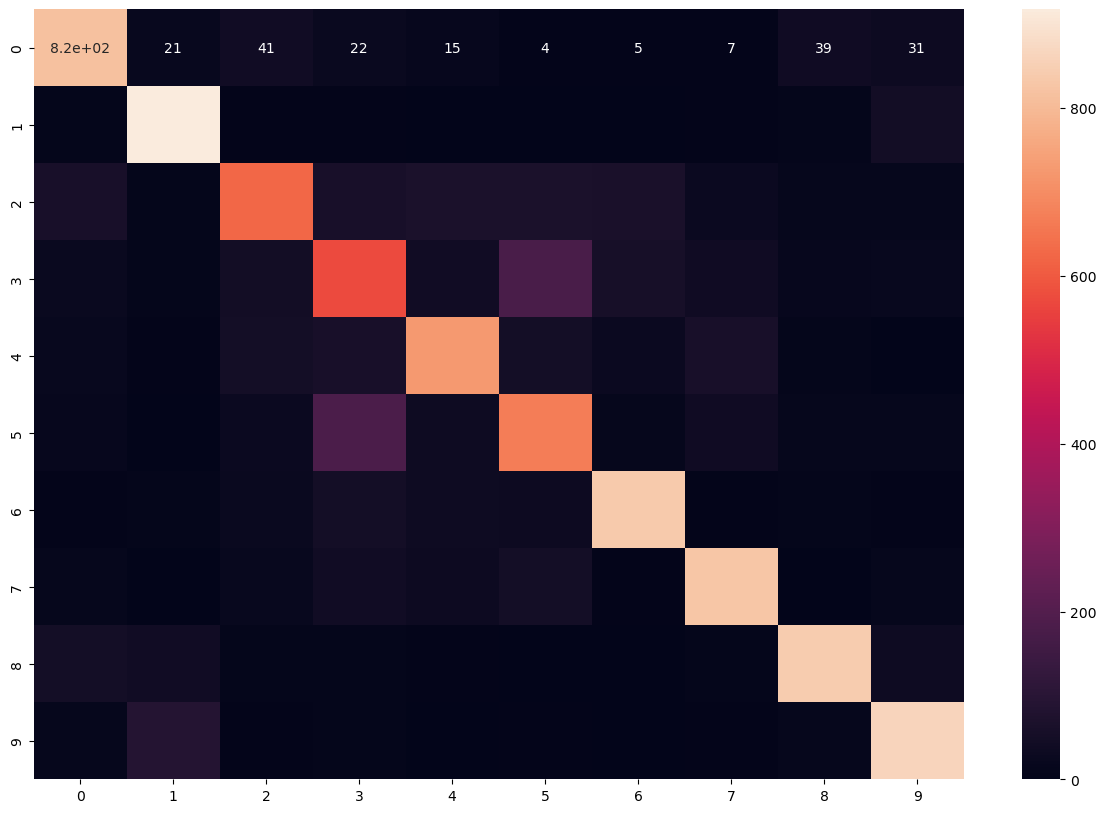

In [67]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

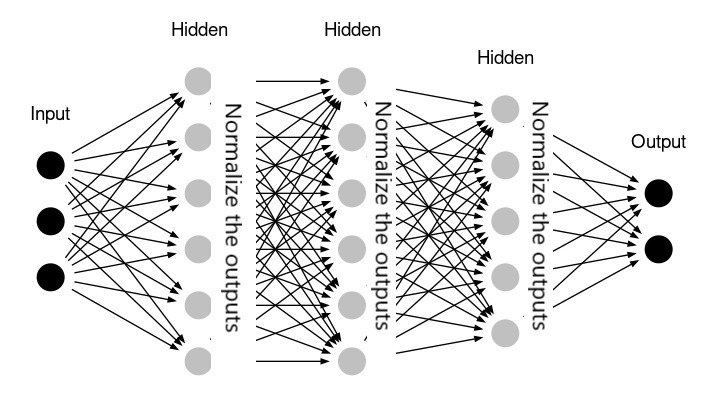

In [68]:
from tensorflow.keras.layers import BatchNormalization

In [69]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [70]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

C:\Users\mertu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 4, 4, 256)           │         590,0

 Total params: 1,474,218 (5.62 MB)

 Trainable params: 1,471,530 (5.61 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [71]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 120ms/step - accuracy: 0.3604 - loss: 1.9534 - val_accuracy: 0.6020 - val_loss: 1.1150
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.6606 - loss: 0.9799 - val_accuracy: 0.6546 - val_loss: 1.0502
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 229s 147ms/step - accuracy: 0.7472 - loss: 0.7472 - val_accuracy: 0.7402 - val_loss: 0.7631
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 276s 155ms/step - accuracy: 0.7984 - loss: 0.6071 - val_accuracy: 0.7455 - val_loss: 0.7379
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 163ms/step - accuracy: 0.8360 - loss: 0.5011 - val_accuracy: 0.7811 - val_loss: 0.6464
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 263s 168ms/step - accuracy: 0.8665 - loss: 0.4052 - val_accuracy: 0.8002 - val_loss: 0.6058
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 269s 172ms/step - accuracy: 0.8953 - loss: 0.3192 - val_accuracy: 0.8214 - val_loss: 0.5499
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 318s 169ms/s

In [73]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7673975229263306
Test accuracy: 0.8216999769210815


In [74]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step


In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1000
           1       0.92      0.90      0.91      1000
           2       0.78      0.71      0.74      1000
           3       0.69      0.67      0.68      1000
           4       0.82      0.81      0.82      1000
           5       0.78      0.71      0.74      1000
           6       0.80      0.92      0.85      1000
           7       0.91      0.81      0.86      1000
           8       0.88      0.91      0.89      1000
           9       0.84      0.91      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

